# Project description
We wil perform data analyisis using a dataset from the telecom operator Megaline. Megaline offers its customers two prepaid plans, Surf and Ultimate. The main objective is to know:
- Which of the plans brings in more revenue
- Which factors effect churn rate in order to adjust the advertising budget.

We will carry this analysis using a subset of 500 Megaline customers. 

**Step 1. Describe The Data**
- Load the datasets
- investigate formatting
- Describe basic numeric and categorical info


**Step 2. Overview of churn**
- Sign up and churn dates
- Churn by customer location
- Churn by age

**Step 3. Prepare the data**
- Format the dataframes correctly for analysis and convert datatypes
- Find and eliminate errors in the data
- Explain what errors found and methods used eliminated them.

**Step 4. Analyze per User**
- The number of calls made and minutes used per month
- The number of text messages sent per month
- The volume of data per month

**Step 5. Analyze Overall**
- The monthly revenue from each user (subtract the free package limit from
- the total number of calls, text messages, and data; multiply the result by
- the calling plan value; add the monthly charge depending on the calling
plan)


**Step 6. Analyze the data**
- Describe the customers' behavior. Find the minutes, texts, and volume of data
the users of each plan require per month. Calculate the mean, variance, and
standard deviation. Plot histograms. Describe the distributions.

**Step 7. Test the hypotheses**
- The average revenue from users of Ultimate and Surf calling plans differs.
- The average revenue from users in NYNJ area is different from that of the
users from other regions.


**Conclusion:**
- How you formulated the null and alternative hypotheses.
- What criterion you used to test the hypotheses and why.
- Write an overall conclusion

In [34]:
# Import the nesseacry libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats
import warnings

In [35]:
# Load all the datasets and review the datatypes
call_df = pd.read_csv("Megaline Cellphone Billing EDA/data/megaline_calls.csv")
net_df = pd.read_csv("Megaline Cellphone Billing EDA/data/megaline_internet.csv")
msg_df = pd.read_csv("Megaline Cellphone Billing EDA/data/megaline_messages.csv")
plan_df = pd.read_csv("Megaline Cellphone Billing EDA/data/megaline_plans.csv")
user_df = pd.read_csv("Megaline Cellphone Billing EDA/data/megaline_users1.csv")

In [36]:
# Looping through the datasets and printing the first few rows
datasets = [call_df, net_df, msg_df, plan_df, user_df]

for ds in datasets:
  display(ds.head())
  print()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [37]:
# Looping through the datasets and displaying the info
for ds in datasets:
  display(ds.info())
  print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   tariff      500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

# Dataset Summary
- Due to the nature of the datasets we will perform numerical analysis once usage is formated by date
- The three plan usage datasets are similarly formatted
    - Most likely some inconsistent user_ids across the datasets will test later
    - Need to convert object dates to datetime
    - convert floats to ints once rounded up for each dataset and according to Megaline policy
- We have the charges specific to each plan 
- User details which is missing some churn dates most likely still customers
    - Also need to convert reg_date to datetime

# **Step 2. Overview of churn**
##2(a). Sign up and churn dates

In [38]:
# Parsing the state and city for grouping comparisons
address = user_df['city'].str.rsplit(" ", 2, expand=True)
user_df['state'] = address[1]
user_df['address'] = address[0]

In [39]:
# Converting registration and churn date columns to datetime 
user_df['reg_date'] = pd.to_datetime(user_df['reg_date'],yearfirst=True)
user_df['churn_date'] = pd.to_datetime(user_df['churn_date'],yearfirst=True)

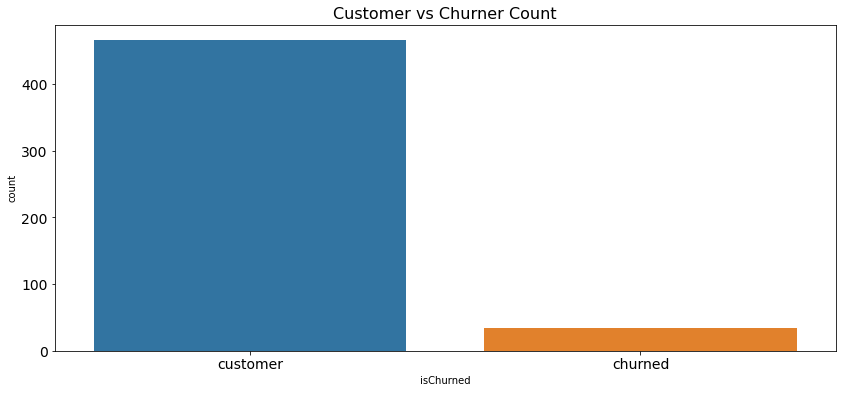

In [40]:
# Creating isChurned column for counts
# np.where(condition, value if condition is true, value if condition is false)
user_df['isChurned'] = np.where(user_df['churn_date'].isna(), 0, 1)

viz = sns.countplot(x=user_df['isChurned'])
viz.figure.set_size_inches(14,6)
viz.set_title("Customer vs Churner Count", fontsize=16)
viz.set_xticklabels(['customer', 'churned'], size = 14)
viz.set_yticklabels(range(0,500,100), size = 14);

####
AVERAGE TIME BEFORE CHURN: 141.65 DAYS
####


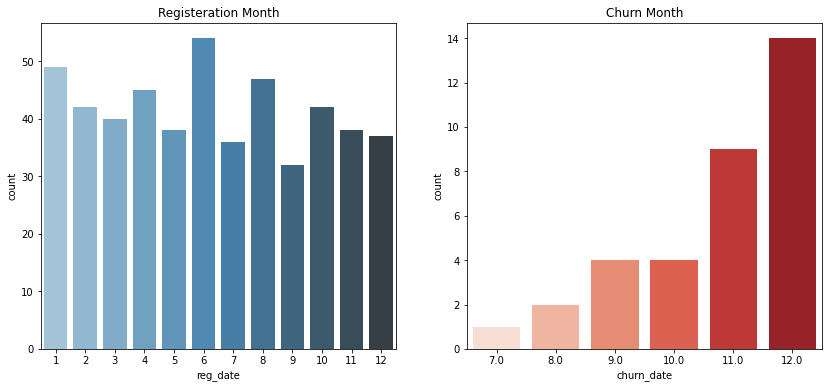

In [41]:
# Counting and averaging days from sign on to churn
user_df['days_on_policy'] = (user_df['churn_date'] - user_df['reg_date']).astype(str).str.split(" ", expand=True)[0].replace('NaT', np.nan).astype(float)
churn_avg_days = round(user_df['days_on_policy'].mean(), 2)
print("####")
print("AVERAGE TIME BEFORE CHURN:", churn_avg_days,'DAYS')
print("####")


# Extracting sign on and churn months
reg_month = user_df['reg_date'].dt.month
churn_month = user_df['churn_date'].dt.month

# Plotting churn months and printing average time on plan
fig, ax = plt.subplots(1, 2)
sns.countplot(x=reg_month, ax = ax[0], palette='Blues_d')
sns.countplot(x=churn_month, ax = ax[1], palette='Reds')
ax[0].figure.set_size_inches(14,6)
ax[0].set_title("Registeration Month")
ax[1].set_title("Churn Month")
plt.show()

# Conclusion
- January, June, and August have the highest sign on month and December highest churn month with an average of 141 days between churners signing on and churning meaning churner most likely sign on in June and August and Churn in Novermber and December
- People are waiting for new year sales to purchase new plans
- What event is happening in the summer months and why is July so low?
- Are their new plans released or new phones being bought christmas that need new sims


## 2(b). Churn counts and percentage by customer location

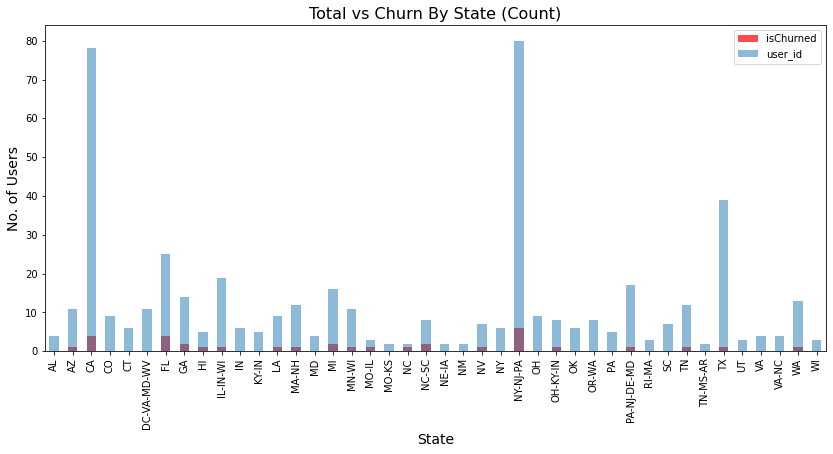

In [42]:
# Plotting the total number of plans against the number of churns
churn_by_state = user_df.groupby('state')['isChurned'].sum()
total_by_state = user_df.groupby('state')['user_id'].count()

churn_by_state.plot(kind = 'bar', figsize=(14,6), color='red', alpha=.7)
total_by_state.plot(kind = 'bar', figsize=(14,6), alpha =0.5)

plt.xticks(rotation=90)
plt.ylabel('No. of Users', fontsize=14)
plt.xlabel("State", fontsize=14)
plt.title("Total vs Churn By State (Count)", fontsize=16)
plt.legend();

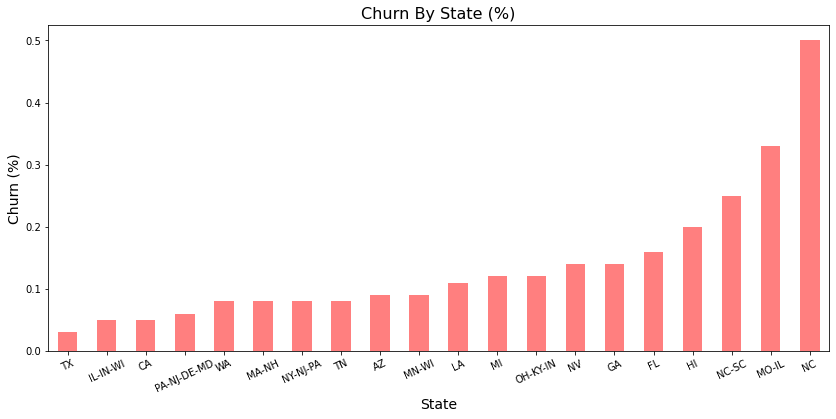

In [43]:
# Churn percentage
churn_by_state_perc = (churn_by_state / total_by_state).round(2).sort_values()
# Plotting churn percentage
churn_by_state_perc[22:].plot(kind = 'bar', figsize=(14,6), color='red', alpha=0.5)
plt.xticks(rotation=25)
plt.ylabel('Churn (%)', fontsize=14)
plt.xlabel("State", fontsize=14)
plt.title("Churn By State (%)", fontsize=16);

# Conclusion
- Highest churn counts CA, FL, NY-NJ
- However, highest ratio of churn to retention NC, MO-IL, HI, NC-SC, FL, GA
- Seem like US region if a factor over specific states

## 2(b) - Cont. Churn counts and percentage by customer region

In [44]:
# Mapping states to region per wikipedia
# https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States
region_dict = {}

region_dict['northeast'] = ['NY-NJ-PA', "PA-NJ-DE-MD", 'NY', 'CT', 'MA-NH',"RI-MA", 'DC-VA-MD-WV', 'PA', 'MD']   
region_dict['midwest'] = ['OH', 'OK', 'MI', 'IL-IN-WI', 'MO-IL', 'NE-IA', 'MO-KS', 'MN-WI', 'WI', 'UT']
region_dict['southeast'] = ['TX','NC-SC', 'NC-VA', 'GA', 'FL', 'TN', 'KY-IN', 'TN-MS-AR', 'LA', 'IN', 'VA-NC', 'AL', 'NC', 'OH-KY-IN', 'SC', 'VA']
region_dict['pacific'] = ['CA', 'NV', 'OR', 'WA', 'HI', 'OR-WA']
region_dict['intermountain'] = ['NM', 'CO', 'AZ']

# Extracting user region counts from user state column
region_list=[]
for row in user_df['state']:
  for k, v in region_dict.items():
    for el in v:
      if el == row:
        region_list.append(k)

user_df['region'] = region_list

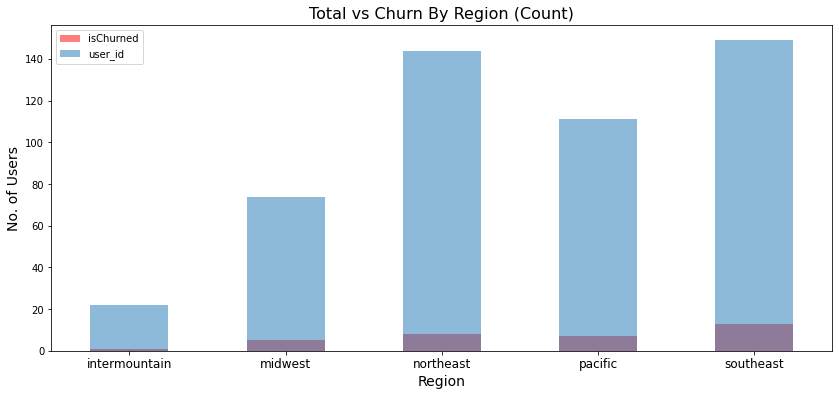

In [45]:
# Plotting the total number of plans against the number of churns
churn_by_region = user_df.groupby('region')['isChurned'].sum()
total_by_region = user_df.groupby('region')['user_id'].count()

churn_by_region.plot(kind = 'bar', figsize=(14,6), alpha =0.5, color='red')
total_by_region.plot(kind = 'bar', figsize=(14,6), alpha =0.5)

plt.xticks(rotation=0, fontsize=12)
plt.ylabel('No. of Users', fontsize=14)
plt.xlabel("Region", fontsize=14)
plt.title("Total vs Churn By Region (Count)", fontsize=16)
plt.legend();

# Conclusion
- Southeast has the most customers in the region with Northeast and both have the highest count of churners
- However Pacific and Midwest have the highest ratio of churn to retention 

##2(c). Churn by Age



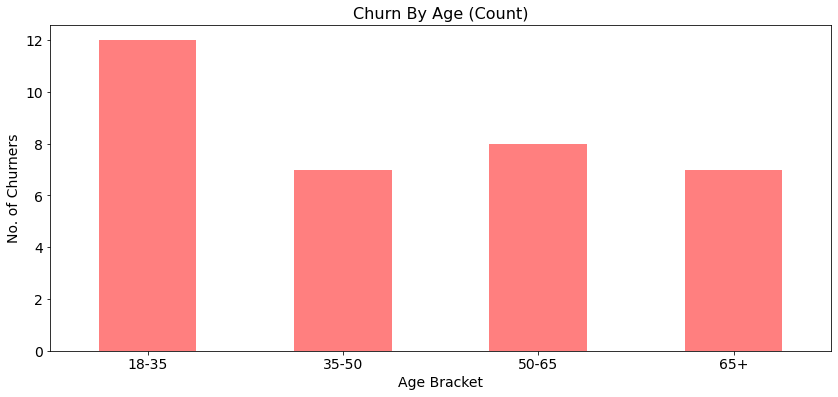

In [46]:
# Plotting the total number of churners by age bracket
# churn_by_age = user_user_user_df.groupby('age')['isChurned'].sum()
user_df['age_bracket'] = pd.cut(user_df['age'], bins=[0, 35, 50, 65, 100], labels=['18-35', '35-50', '50-65', '65+'])


churn_by_age = user_df.groupby('age_bracket')['isChurned'].sum()


churn_by_age.plot(kind = 'bar', figsize=(14,6), color='red', alpha=0.5)

plt.xticks(rotation=90)
plt.ylabel('No. of Churners', fontsize=14)
plt.xlabel("Age Bracket", fontsize=14)
plt.xticks(fontsize=14, rotation=0)
plt.yticks( fontsize=14)
plt.title("Churn By Age (Count)", fontsize=16);

# Step 2. Overall Conclusion
- Southern states and Southern region, followed closely by Northern states and Northeast region have highest counts of customers/churners
- States with highest churn counts CA, FL, NY-NJ
- Pacific and Midwest regions have the highest churn ratios 
- States like MO-IL and HI the worst offenders in these regions


# Step 3. Does Plan Category Have An Effect On Customer Usage 
##Format the dataframes correctly for analysis and convert datatypes

- Find and eliminate errors in the data
- Explain what errors found and methods used eliminated them.


In [47]:
# Creating dictionaries of user_id to plan, state, region for later analysis
# All user_ids and corresponding plan category 
user_plan_dict = dict(zip(user_df['user_id'], user_df['tariff']))
user_state_dict = dict(zip(user_df['user_id'], user_df['state']))
user_region_dict = dict(zip(user_df['user_id'], user_df['region']))
# List of month names for indexing purposes
months = [1,2,3,4,5,6,7,8,9,10,11,12]

**Note:** To investigate true usage we are not rounding up as per Megaline policy we will do this when calculating total tariff

In [48]:
# Function to change datatypes, format the dataframe into a pivot table, and map values
def monthly_usage(df, date_col, agg_val, agg_func):
    df['month'] = pd.to_datetime(df[date_col]).dt.month
    pivot = df.pivot_table(index='user_id', values=agg_val, columns='month', aggfunc=agg_func, fill_value=0)
    pivot['monthly_avg_count'] = round((pivot[months].sum(axis=1) / 12),2)
    # Map plan category with all user_ids in (msg/call/net) pivot tables
    pivot['plan_category'] = pivot.index.map(user_plan_dict)
    pivot['plan_base_price'] = pivot['plan_category'].replace({'surf':50, 'ultimate':70})
    pivot['state'] = pivot.index.map(user_state_dict)
    pivot['region'] = pivot.index.map(user_region_dict)
    return pivot

# Creating pivots from each
msg_count = monthly_usage(msg_df, 'message_date', 'message_date', 'count')
call_count = monthly_usage(call_df, 'call_date', 'duration', 'count')
min_count = monthly_usage(call_df, 'call_date', 'duration', 'sum')
net_count = monthly_usage(net_df, 'session_date', 'mb_used', 'sum')

In [49]:
count_pivots = [msg_count, call_count, min_count, net_count]
titles = ['Msgs Usage Per Month', 'Calls Usage Per Month', 'Mins Usage Per Month', 'MBs Usage Per Month']

for title, pivot in zip(titles, count_pivots):
  print(title)
  display(pivot.head())
  print('\n\n')

Msgs Usage Per Month


month,1,2,3,4,5,6,7,8,9,10,11,12,monthly_avg_count,plan_category,plan_base_price,state,region
user_id,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,0,11,0.92,ultimate,70,GA,southeast
1001,0,0,0,0,0,0,0,30,44,53,36,44,17.25,surf,50,WA,pacific
1002,0,0,0,0,0,0,0,0,0,15,32,41,7.33,surf,50,NV,pacific
1003,0,0,0,0,0,0,0,0,0,0,0,50,4.17,surf,50,OK,midwest
1004,0,0,0,0,7,18,26,25,21,24,25,31,14.75,surf,50,WA,pacific





Calls Usage Per Month


month,1,2,3,4,5,6,7,8,9,10,11,12,monthly_avg_count,plan_category,plan_base_price,state,region
user_id,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,0,16,1.33,ultimate,70,GA,southeast
1001,0,0,0,0,0,0,0,27,49,65,64,56,21.75,surf,50,WA,pacific
1002,0,0,0,0,0,0,0,0,0,11,55,47,9.42,surf,50,NV,pacific
1003,0,0,0,0,0,0,0,0,0,0,0,149,12.42,surf,50,OK,midwest
1004,0,0,0,0,21,44,49,49,42,61,54,50,30.83,surf,50,WA,pacific





Mins Usage Per Month


month,1,2,3,4,5,6,7,8,9,10,11,12,monthly_avg_count,plan_category,plan_base_price,state,region
user_id,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,116.83,9.74,ultimate,70,GA,southeast
1001,0.0,0.0,0.0,0.0,0.00,0.00,0.00,171.14,297.69,374.11,404.59,392.93,136.70,surf,50,WA,pacific
1002,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,54.13,359.76,363.24,64.76,surf,50,NV,pacific
1003,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1041.00,86.75,surf,50,OK,midwest
1004,0.0,0.0,0.0,0.0,181.58,261.32,358.45,334.86,284.60,341.63,452.98,403.53,218.25,surf,50,WA,pacific





MBs Usage Per Month


month,1,2,3,4,5,6,7,8,9,10,11,12,monthly_avg_count,plan_category,plan_base_price,state,region
user_id,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1901.47,158.46,ultimate,70,GA,southeast
1001,0.0,0.0,0.0,0.0,0.00,0.00,0.00,6919.15,13314.82,22330.49,18504.30,19369.18,6703.16,surf,50,WA,pacific
1002,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,6552.01,19345.08,14396.24,3357.78,surf,50,NV,pacific
1003,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,27044.14,2253.68,surf,50,OK,midwest
1004,0.0,0.0,0.0,0.0,6547.21,20672.82,24516.62,27981.74,18852.72,14541.63,21850.78,21389.29,13029.40,surf,50,WA,pacific


# Overall Monthly Usage: Descriptive Statistics

In [50]:
count_pivots = [msg_count, call_count, min_count, net_count]
titles = ['Msgs', 'Calls', 'Mins', 'MBs']
g = ['surf', 'ultimate']



for t, p in zip(titles, count_pivots):
  print(t+" Average Monthly Usage By Plan Category")
  print("-----------------------------------")
  print(f"{g[0]} Avg Monthly {t} Count:", round(p[p['plan_category'] == g[0]]['monthly_avg_count'].mean(), 2))
  print(f"{g[1]} Avg Monthly {t} Count:", round(p[p['plan_category'] == g[1]]['monthly_avg_count'].mean(), 2), '\n')
  print(f"{g[0]} Avg Monthly {t} Std Dev:", round(p[p['plan_category'] == g[0]]['monthly_avg_count'].std(), 2))
  print(f"{g[1]} Avg Monthly {t} Std Dev:", round(p[p['plan_category'] == g[1]]['monthly_avg_count'].std(), 2),'\n')
  print(f"{g[0]} Avg Monthly {t} Variance:", round(p[p['plan_category'] == g[0]]['monthly_avg_count'].var(),2))
  print(f"{g[1]} Avg Monthly {t} Variance:", round(p[p['plan_category'] == g[1]]['monthly_avg_count'].var(),2), '\n------------------------------------\n\n')

Msgs Average Monthly Usage By Plan Category
-----------------------------------
surf Avg Monthly Msgs Count: 15.13
ultimate Avg Monthly Msgs Count: 17.07 

surf Avg Monthly Msgs Std Dev: 15.63
ultimate Avg Monthly Msgs Std Dev: 16.77 

surf Avg Monthly Msgs Variance: 244.17
ultimate Avg Monthly Msgs Variance: 281.39 
------------------------------------


Calls Average Monthly Usage By Plan Category
-----------------------------------
surf Avg Monthly Calls Count: 24.05
ultimate Avg Monthly Calls Count: 23.47 

surf Avg Monthly Calls Std Dev: 19.86
ultimate Avg Monthly Calls Std Dev: 19.88 

surf Avg Monthly Calls Variance: 394.5
ultimate Avg Monthly Calls Variance: 395.18 
------------------------------------


Mins Average Monthly Usage By Plan Category
-----------------------------------
surf Avg Monthly Mins Count: 162.75
ultimate Avg Monthly Mins Count: 157.24 

surf Avg Monthly Mins Std Dev: 134.69
ultimate Avg Monthly Mins Std Dev: 133.33 

surf Avg Monthly Mins Variance: 18141.

# Per Month Usage by Plan Catplot Visualization 

In [66]:
def catplot(df, title):
    viz = sns.catplot(data=df, col='plan_category')
    viz.set_xlabels(fontsize=14)
    viz.set_ylabels(fontsize=14)
    viz.fig.subplots_adjust(top=0.85)
    viz.fig.suptitle(f"{title} by Month/Plan", fontsize=16)
    plt.show()
    print('\n\n')

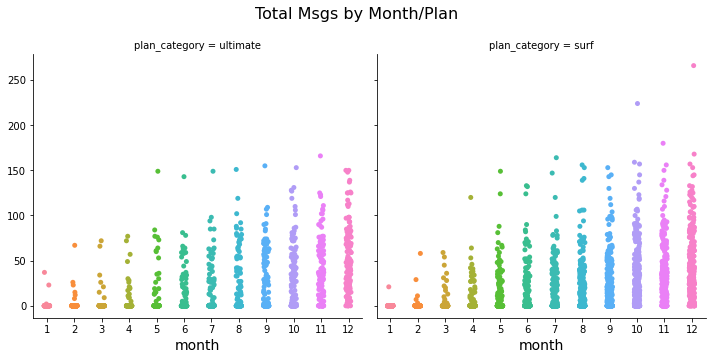

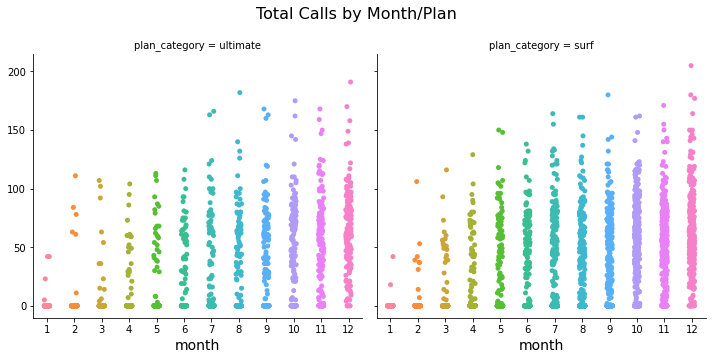

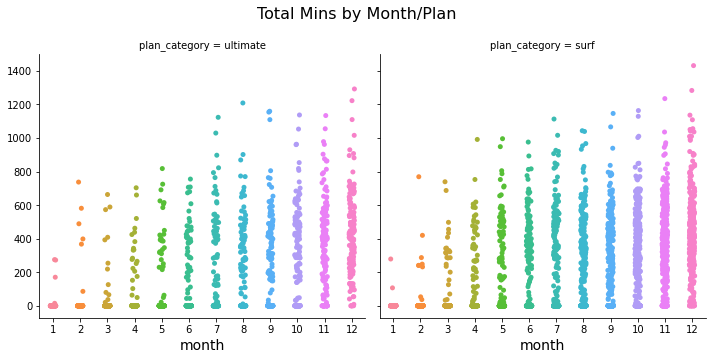

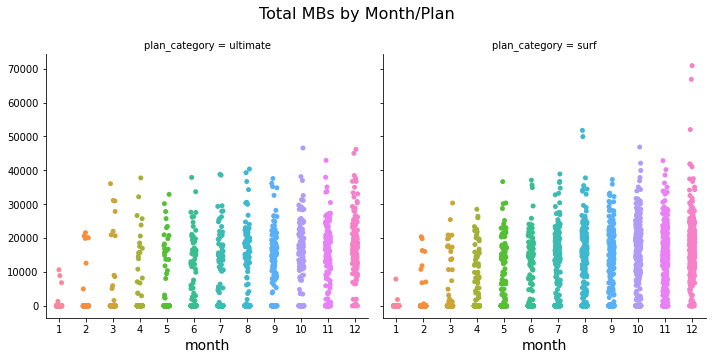

In [67]:
pivots = [msg_count, call_count, min_count, net_count]
titles = ['Total Msgs', 'Total Calls', 'Total Mins', 'Total MBs']

for p, t in zip(pivots, titles):
  catplot(p.drop(['plan_base_price','monthly_avg_count'], axis=1), t)

# Distplot Of Average Monthly Usage Count (Greater Insight on Usage Density)

In [163]:
def distplot(df, cat_col, title, hue):
  warnings.filterwarnings('ignore')

  groups = df[cat_col].unique()
  if len(groups) ==2:
    t, p =   stats.ttest_ind(df[df['plan_category'] == 'surf']['monthly_avg_count'], 
                          df[df['plan_category'] == 'ultimate']['monthly_avg_count'])
    textstr = f"Students Ttest\nT-stat: {t.round(3)}\np-value: {p.round(3)}"
  
  else:
    group_vals = []
    for g in groups:
      group_vals.append(df[df[cat_col] == g]['monthly_avg_count'])
      

    f, p = stats.f_oneway(*group_vals)
    textstr = f"One-Way ANOVA\nF-stat: {f.round(3)}\np-value: {p.round(3)}"

  for g in groups:
    print(f"Sample Size of {g} Customers Who Used {title}: "+str(len(df[df[cat_col] == g]['monthly_avg_count'])))
    viz = sns.distplot(df[df[cat_col] == g]['monthly_avg_count'], fit_kws=dict(linewidth=2.5))
  

  viz.set_title(f"Average Monthly {title} by {hue}", fontsize=16)
  plt.legend(df[cat_col].unique())
  viz.figure.set_size_inches(12,6)
  viz.set_xlabel(viz.get_xlabel(), fontdict={'size': 14})
  viz.set_ylabel(viz.get_ylabel(), fontdict={'size': 14})
  plt.text(np.quantile(df[df[cat_col] == g]['monthly_avg_count'], 0.9999), 0.00001,  textstr, fontdict={'size': 14})
  plt.show()
  print('\n\n')

Sample Size of ultimate Customers Who Used Msgs: 132
Sample Size of surf Customers Who Used Msgs: 270


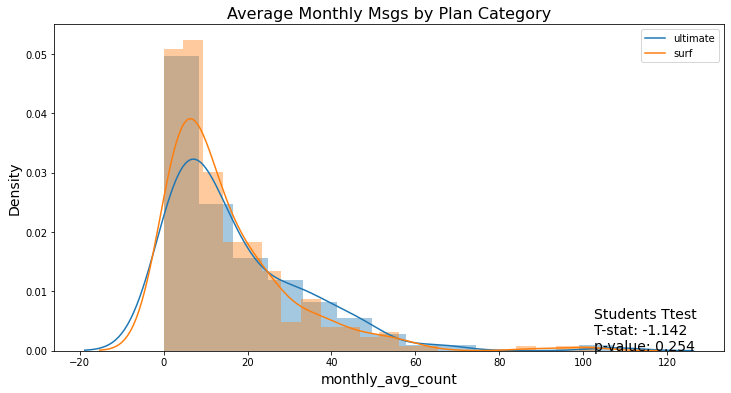




Sample Size of ultimate Customers Who Used Calls: 155
Sample Size of surf Customers Who Used Calls: 326


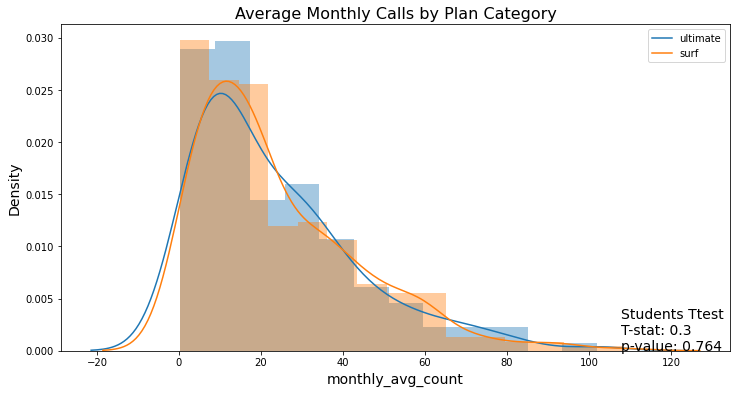




Sample Size of ultimate Customers Who Used Mins: 155
Sample Size of surf Customers Who Used Mins: 326


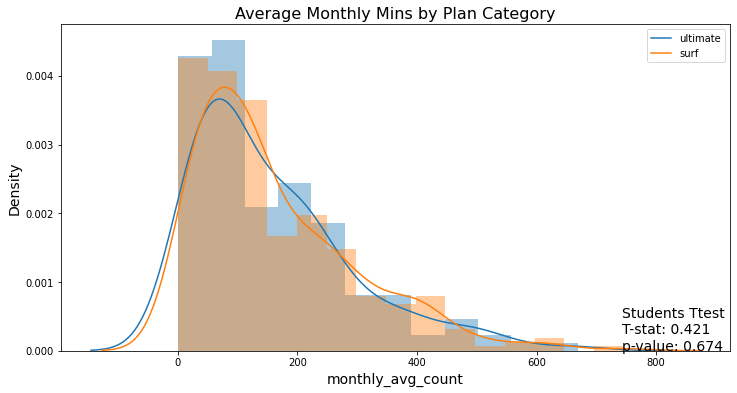




Sample Size of ultimate Customers Who Used MBs: 157
Sample Size of surf Customers Who Used MBs: 332


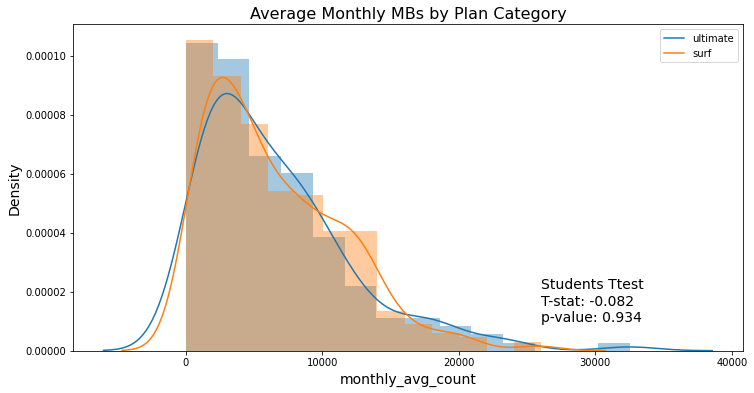

In [164]:
pivots = [msg_count, call_count, min_count, net_count]
titles = ['Msgs', 'Calls', 'Mins', 'MBs']

for p, t in zip(pivots, titles):
  distplot(p, 'plan_category', t, 'Plan Category')

# Step 3. Overall Conclusion
- Clear usage increase as the year progresses with many of these users seeming to sign on around April and beyond
    - The sampling method used appears to be biased towards new customers
- Ultimate users send more more messages per month on average, however, there is more spread/variance among this group than with surf users
- Average call counts is almost identical across both plan categories in terms of quantity and spread. However surf users make longer calls on average though their usage is more varied
- Conversly to average minutes ultimate users spend longer online using moire mbs on average
- Though usage across the 4 metrics appears to have slight impact, in particular for minutes and mbs, the sample size appears too small, imbalanced, and potentially biased towards new users to be able to reject the null hypthiesis (no correlation between plan category and usage pattern)




# Step 4. Does Region Have An Effect On Usage 


Sample Size of southeast Customers Who Used Msgs: 119
Sample Size of pacific Customers Who Used Msgs: 91
Sample Size of midwest Customers Who Used Msgs: 64
Sample Size of northeast Customers Who Used Msgs: 111
Sample Size of intermountain Customers Who Used Msgs: 17


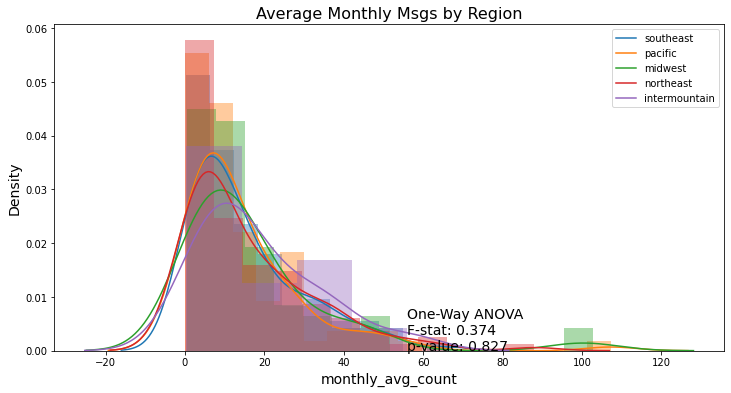




Sample Size of southeast Customers Who Used Calls: 142
Sample Size of pacific Customers Who Used Calls: 109
Sample Size of midwest Customers Who Used Calls: 71
Sample Size of northeast Customers Who Used Calls: 139
Sample Size of intermountain Customers Who Used Calls: 20


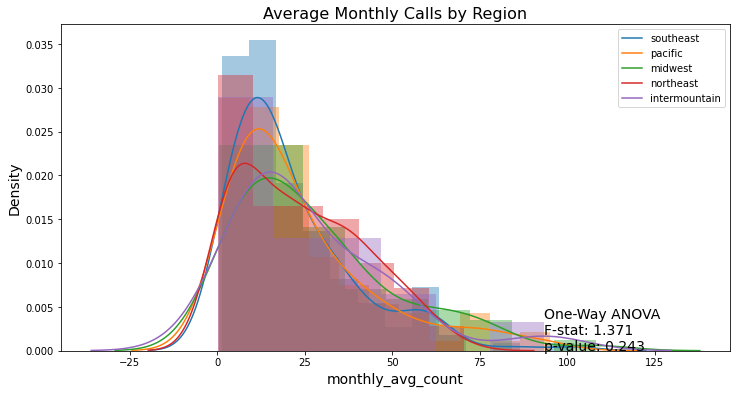




Sample Size of southeast Customers Who Used Mins: 142
Sample Size of pacific Customers Who Used Mins: 109
Sample Size of midwest Customers Who Used Mins: 71
Sample Size of northeast Customers Who Used Mins: 139
Sample Size of intermountain Customers Who Used Mins: 20


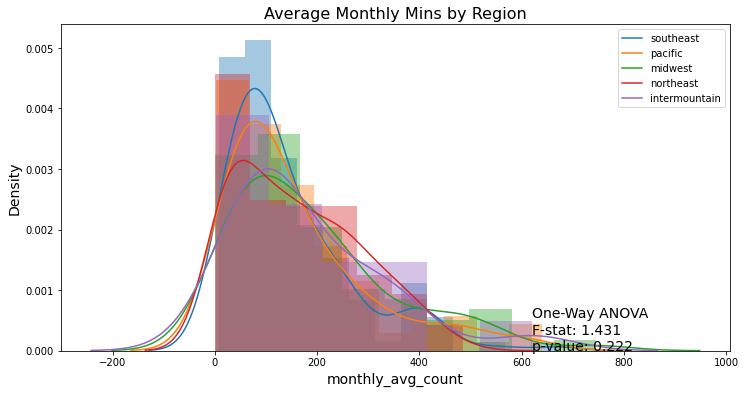




Sample Size of southeast Customers Who Used MBs: 143
Sample Size of pacific Customers Who Used MBs: 111
Sample Size of midwest Customers Who Used MBs: 74
Sample Size of northeast Customers Who Used MBs: 141
Sample Size of intermountain Customers Who Used MBs: 20


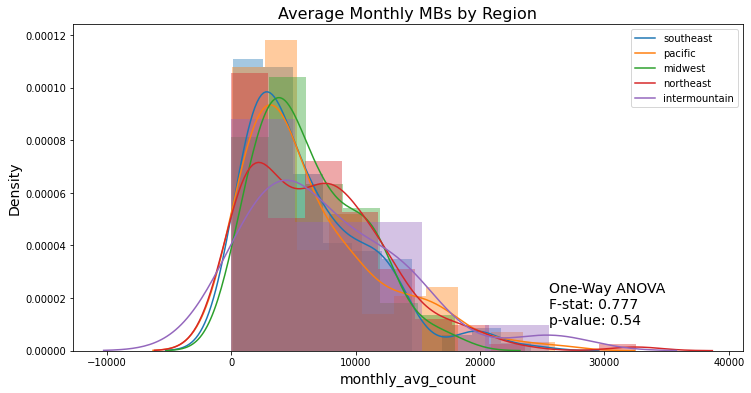

In [107]:
pivots = [msg_count, call_count, min_count, net_count]
titles = ['Msgs', 'Calls', 'Mins', 'MBs']

for p, t in zip(pivots, titles):
  distplot(p, 'region', t, 'Region')

# Step 4. Overall Conclusion
- We can not reject the null hypothesis
- No clear statistically signifigant differences from this sample 
- Categories are imbalanced with ratio of between 1:3 - 1:6 when compared to other regions
- Average messages between regions is extremely similar
- Cluster of Midwest users send 100 messages on average per month
- North-East and Mid-West users make the most calls
- Most South-East and Pacific users make fewer calls
- North-East and Inter-Mountain users use more monthly mb's on average 
- All distributions are right skewed

# Notes on distribution attributes 
- Call count and minutes distributions are closely aligned 
- Distributions also have clusters of users at the high edge (Pacific, Inter-Mountain)

# Step 5. Does the revenue of users from NY-NJ differ from other regions?


# Function To Convert Usage Counts to Usage Cost 




In [56]:
def calc_extra_cost(pivot, surf_lim, ultim_lim, surf_excharge, 
                    ultim_excharge, excharge_col):

  # If call minutes then round up to the next minute
  if str(pivot) == 'min_count':
    pivot[months] = np.ceil(pivot[months])
  
  # If megabytes round up to the next thousand
  if str(pivot) == 'net_count':
    pivot[months] = pivot[months].apply(lambda x: np.ceil(x.astype(int) / 1000) * 1000)

  
  numerics = pivot.select_dtypes(include=['int', 'float'])
  objects = pivot.select_dtypes(include=['object'])

  numerics['plan_base_limit'] = numerics['plan_base_price'].replace({50:surf_lim, 70:ultim_lim})
  numerics[excharge_col] = numerics['plan_base_limit'].replace({surf_lim:surf_excharge, ultim_lim:ultim_excharge})

  # Subracting the monthly limit from the total monthly usage and replacing negative values with 0
  numerics[months] = numerics[months].subtract(numerics['plan_base_limit'], axis=0)
  numerics[numerics[months] < 0] = 0

  # Summing the total amount of usage over the limit and its total cost into columns)
  numerics[months] = numerics[months].mul(numerics[excharge_col], axis=0).round(2)

  numerics['total_excess_cost'] = round(numerics[months].sum(axis=1), 2) 
  numerics['monthly_avg_cost'] =   round(numerics['total_excess_cost'] / 12, 2)

  # Removing columns used for calulting monthly costs
  numerics = numerics.drop(['plan_base_price', 'monthly_avg_count', 'plan_base_limit', excharge_col], axis=1)
  pivot = pd.concat([numerics, objects],axis=1)

  return pivot

In [57]:
# df, date_col, agg_val, agg_func, surf_lim, ultim_lim, surf_charge, unlim_charge, extra_charge_col, extra_count_col, total_extra
msg_charges = calc_extra_cost(msg_count, 50, 1000, 0.03, 0.01, 'extra_msg_charge')
call_charges = calc_extra_cost(min_count, 500, 3000, 0.03, 0.01, 'extra_min_charge')
mb_charges= calc_extra_cost(net_count, 15000, 30000, 0.01, 0.007, 'extra_mb_charge')

In [58]:
msg_charges.head()

month,1,2,3,4,5,6,7,8,9,10,11,12,total_excess_cost,monthly_avg_cost,plan_category,state,region
user_id,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,ultimate,GA,southeast
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.09,0.0,0.0,0.09,0.01,surf,WA,pacific
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,surf,NV,pacific
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,surf,OK,midwest
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,surf,WA,pacific


In [59]:
call_charges.head()

month,1,2,3,4,5,6,7,8,9,10,11,12,total_excess_cost,monthly_avg_cost,plan_category,state,region
user_id,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,ultimate,GA,southeast
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,surf,WA,pacific
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,surf,NV,pacific
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.23,16.23,1.35,surf,OK,midwest
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,surf,WA,pacific


In [60]:
mb_charges.head()

month,1,2,3,4,5,6,7,8,9,10,11,12,total_excess_cost,monthly_avg_cost,plan_category,state,region
user_id,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,ultimate,GA,southeast
1001,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,73.3,35.04,43.69,152.03,12.67,surf,WA,pacific
1002,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,43.45,0.00,43.45,3.62,surf,NV,pacific
1003,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,120.44,120.44,10.04,surf,OK,midwest
1004,0.0,0.0,0.0,0.0,0.0,56.73,95.17,129.82,38.53,0.0,68.51,63.89,452.65,37.72,surf,WA,pacific


# Distribution of excess charges by month
- Surf users tend to pay more across all three metrics
- Positive linear relationship between excess usage and months across all categories
- Surf users pay `$1` to `$4` extra for excess messages 
- Surf users pay `$5` to `$15` extra for excess minutes
- Ultimate usera pay  `$25` to `$100` for excess MBs, though surf users usually pay 2 or 3x more up to `$500`

- Increase in outliers among surf user excess minute during months 2, 3, 4, 5, 6


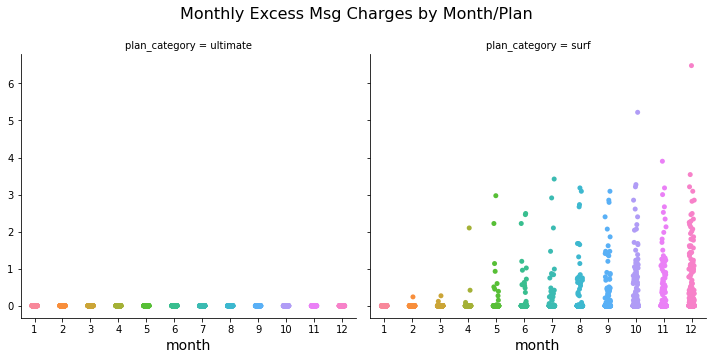

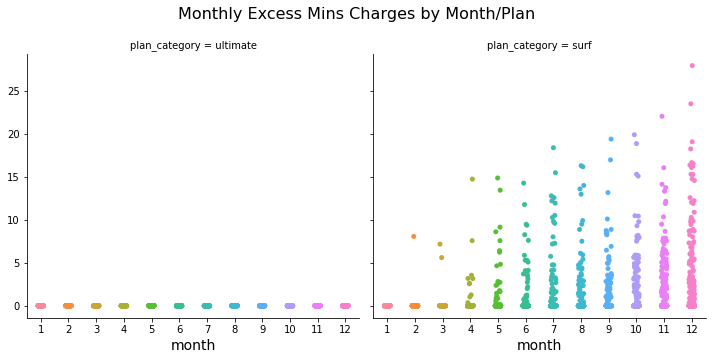

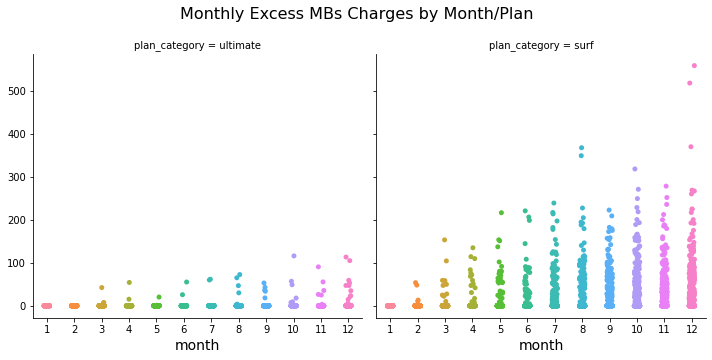

In [70]:
pivots = [msg_charges, call_charges, mb_charges]
titles = ['Monthly Excess Msg Charges', 'Monthly Excess Mins Charges', 'Monthly Excess MBs Charges']

for p, t in zip(pivots, titles):
  catplot(p.drop(['monthly_avg_cost','total_excess_cost'], axis=1), t)

In [ ]:
pivots = [msg_charges, call_count, min_count, net_count]
titles = ['Msgs', 'Calls', 'Mins', 'MBs']

for p, t in zip(pivots, titles):
  distplot(p, 'region', t, 'Region')

# Creating a total charges data frame 
- Total per month 
- Monthly Average

In [ ]:
total_charges = mb_charges[months].add(call_charges[months], axis=0, fill_value=0).add(msg_charges[months], axis=0, fill_value=0)
total_charges['plan_category'] = total_charges.index.map(user_plan_dict)
total_charges['plan_base_price'] = total_charges['plan_category'].replace({"surf":50, 'ultimate':70})
total_charges[months] = total_charges[months].add(total_charges['plan_base_price'], axis=0)
total_charges['monthly_avg_charges'] = round(total_charges.sum(axis=1) / 12, 2)

total_charges['state'] = total_charges.index.map(user_state_dict)
total_charges['region'] = total_charges.index.map(user_region_dict)


total_charges.head()

In [ ]:
  viz = sns.catplot(data=total_charges.iloc[:,:13], col='plan_category')
  viz.set_xlabels(fontsize=14)
  viz.set_ylabels(fontsize=14)
  viz.fig.subplots_adjust(top=0.85)
  viz.fig.suptitle(f"Average Monthly Charges", fontsize=16)
  plt.show()

- While usage generally aligns between surf and ultimate users the average monthly cost for surf users is 3-5 times higher than ultimate users due to excess charges

# Average Cost by Plan

In [ ]:
surf_monthly_average_total_charge = round(sum(total_charges[total_charges['plan_category'] == 'surf']['monthly_avg_charges']) / len(total_charges[total_charges['plan_category'] == 'surf']['monthly_avg_charges']),2)
ultimate_monthly_average_total_charges = round(sum(total_charges[total_charges['plan_category'] == 'ultimate']['monthly_avg_charges']) / len(total_charges[total_charges['plan_category'] == 'ultimate']['monthly_avg_charges']),2)

print('Average Mothly Surf Charge: $'+str(surf_monthly_average_total_charge))
print('Average Monthly Ultimate Charge: $'+str(ultimate_monthly_average_total_charges))

In [ ]:
plt.figure(figsize=(12,6))
print()
sns.distplot(total_charges[total_charges['plan_category'] == 'surf']['monthly_avg_charges'])
sns.distplot(total_charges[total_charges['plan_category'] == 'ultimate']['monthly_avg_charges'])
plt.legend(['surf', 'ultimate'])

# Does the average revenue from users in NY-NJ area differ from other areas
# Two Tailed Hypothesis Test
- There is evidence to suggest a low effect size relationship between NY-NJ monthly charges when compred against HI, KY-IN, MN-WI, LA, and NE-IA 
- P-Value ~0.1 indicating statisical significance
- Small sample size may bias effect size


In [ ]:
NYNJ = total_charges[total_charges['state'] == 'NY-NJ-PA']['monthly_avg_charges']
states = total_charges[total_charges['state'] != 'NY-NJ-PA']['state'].unique()



data = []
for state in states:
  state_2_count = len(total_charges[total_charges['state'] == state]['monthly_avg_charges'])
  t, p = stats.ttest_ind(NYNJ, total_charges[total_charges['state'] == state]['monthly_avg_charges'])
  data.append(['NY-NJ-PA', state, state_2_count, t.round(2), p.round(2)])

ttest_df = pd.DataFrame(data, columns=['State_1','State_2', 'State_2_Count','T-Stat', 'P-Value'])
ttest_df = ttest_df.sort_values(by='P-Value', ascending=True)

ttest_df.head(10)  

In [ ]:
for state in list(ttest_df['State_2'].unique())[:5]:
  sns.distplot(total_charges[total_charges['state'] == state]['monthly_avg_charges'], bins=5)

In [ ]:
sns.distplot(NYNJ, bins=20)

In [ ]:
independent_ttest(NYNJ, total_charges[total_charges['state'] == 'HI']['monthly_avg_charges'], 0.05)

# Two Tailed Hypothesis Test
- There is evidence to suggest a low effect size relationship between NY-NJ monthly charges when compred against HI, KY-IN, MN-WI, LA, and NE-IA 
- P-Value ~0.1 indicating statisical significance
- Small sample size may bias effect size


In [ ]:
len(total_charges[total_charges['state'] == 'NY-NJ-PA']['monthly_avg_charges'])

# Average Cost by Existing/Churned Customer

In [ ]:
churned_dict = dict(zip(user_df['user_id'], user_df['isChurned']))
total_charges['isChurned'] = total_charges.index.map(churned_dict)

print('Average Monthly Charge Existing Customer: $'+str(round(sum(total_charges[total_charges['isChurned'] == 0]['monthly_avg_charges']) / len(total_charges[total_charges['isChurned'] == 0]['monthly_avg_charges']),2)))
print('Average Monthly Charge Churned Customer: $'+str(round(sum(total_charges[total_charges['isChurned'] == 1]['monthly_avg_charges']) / len(total_charges[total_charges['isChurned'] == 1]['monthly_avg_charges']),2)))

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(total_charges[total_charges['isChurned'] == 0]['monthly_avg_charges'])
sns.distplot(total_charges[total_charges['isChurned'] == 1]['monthly_avg_charges'])
plt.legend(['Existing', 'Churned'])

- Surf users tend to have higher average monthly charges